# Robbie's Data Vacuuming

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### Imports & Setup

In [2]:
import pandas as pd
from pathlib import Path

# path to the glucose datasets
gpath = Path('.').joinpath('Glucose Data')
print('Path to glucose datasets:', gpath)

for f in gpath.glob('*.csv'):
    print('Found glucose dataset:', f)

Path to glucose datasets: Glucose Data
Found glucose dataset: Glucose Data\UoMGlucose2301.csv
Found glucose dataset: Glucose Data\UoMGlucose2302.csv
Found glucose dataset: Glucose Data\UoMGlucose2303.csv
Found glucose dataset: Glucose Data\UoMGlucose2304.csv
Found glucose dataset: Glucose Data\UoMGlucose2305.csv
Found glucose dataset: Glucose Data\UoMGlucose2306.csv
Found glucose dataset: Glucose Data\UoMGlucose2307.csv
Found glucose dataset: Glucose Data\UoMGlucose2308.csv
Found glucose dataset: Glucose Data\UoMGlucose2309.csv
Found glucose dataset: Glucose Data\UoMGlucose2310.csv
Found glucose dataset: Glucose Data\UoMGlucose2313.csv
Found glucose dataset: Glucose Data\UoMGlucose2314.csv
Found glucose dataset: Glucose Data\UoMGlucose2320.csv
Found glucose dataset: Glucose Data\UoMGlucose2401.csv
Found glucose dataset: Glucose Data\UoMGlucose2403.csv
Found glucose dataset: Glucose Data\UoMGlucose2404.csv
Found glucose dataset: Glucose Data\UoMGlucose2405.csv


Previewing Glucose Data\UoMGlucose2301.csv...
              bg_ts  value
0  01/10/2023 00:04    7.5
1  01/10/2023 00:09    8.0
2  01/10/2023 00:14    8.6
3  01/10/2023 00:19    9.2
4  01/10/2023 00:24    9.7
                  bg_ts  value
45763  18/01/2024 23:48    6.7
45764  18/01/2024 23:53    6.7
45765  18/01/2024 23:53    6.7
45766  18/01/2024 23:58    6.7
45767  18/01/2024 23:58    6.7
Plotting...
                         bg_ts  value
1970-01-01 2023-10-01 00:04:00    7.5
                         bg_ts  value
1970-01-01 2023-10-01 00:04:00    7.5


KeyError: "None of [DatetimeIndex(['1970-01-01 00:00:00'], dtype='datetime64[ns]', freq='30min')] are in the [columns]"

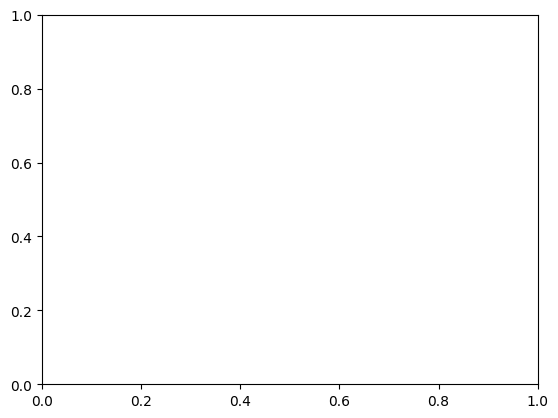

In [3]:
# Preview some glucose data
import matplotlib.pyplot as plt


def preview_glucose_data(file_path):
    plt.close('all')
    df = pd.read_csv(file_path)
    print(df.head())
    print(df.tail())
    print('Plotting...')
    df['bg_ts'] = pd.to_datetime(df['bg_ts'], dayfirst=True, errors='coerce')
    df.set_index(pd.DatetimeIndex(df.index), inplace=True, drop=False)
    df_sampled = df \
        .sort_index() \
        .resample('30min').asfreq()
    print(df_sampled.head())
    print(df_sampled.tail())
    axes = df_sampled.plot.scatter(
        x=df_sampled.index, y='value',
        title='Glucose Levels Over Time',
        linestyle='', marker='o'
    )
    print('...plotted.')
    return axes

preview_fpath = gpath.glob("*.csv")
for fpath in preview_fpath:
    print(f'Previewing {fpath}...')
    break


axes = preview_glucose_data(fpath)
axes

#### Export CSVs to JSON

In [ ]:
from typing import List, Any


class GlucoseDataLoader:
    
    """A class to handle loading and converting glucose data from CSV to JSON format."""
    
    def __init__(self, data_path: Path = gpath):
        self.data_path: Path = Path(data_path)

    def __call__(self, fpath: Path | List[Path]) -> Any:
        """Load CSV data and convert it to JSON format.

        Args:
            fpath (Path | List[Path]): The file path(s) to the CSV file(s).
        """
        return self.loadCsvData(fpath)

    def loadCsvData(self, fpath: Path | List[Path]) -> None:
        """Load a CSV file and convert it to Parquet."""
        if isinstance(fpath, Path):
            fpath = [fpath, ]  # ensure fpath becomes a list of paths
        for path in fpath:
            df = pd.read_csv(path)
            df.name = path.name.replace('.csv', '')
            jpath = self.data_path / 'parquet'
            jpath /= path.name.replace('.csv', '.parquet')
            df.to_parquet(jpath, index=False)


In [ ]:
gloader = GlucoseDataLoader()
gloader.loadCsvData